Importing necessary Libraries

In [1]:
import os
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

Creating rows for defining image id and label and also showing labels in pandas dataframe

In [2]:
df = pd.read_csv("/Python_codes/Pose_estimation_problem/Data/labels.csv")
df.loc[-1] = ['Image_1.jpg', 'sitting']  # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.columns =['Image_id', 'Image_label']
df

,Image_id,Image_label
0,Image_1.jpg,sitting
1,Image_4.jpg,sleeping
2,Image_6.jpg,sleeping
3,Image_15.jpg,sleeping
4,Image_33.jpg,sitting
...,...,...
1264,Image_12527.jpg,running
1265,Image_12577.jpg,sleeping
1266,Image_12594.jpg,sleeping
1267,Image_12596.jpg,sitting


The yolov7-w6-pose.pt weights file is useful because the weights is used for the pre-trained YOLOv7 model. We can load the model from the weight file with torch.load(). The availability of gpu can also be checked.

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('yolov7-w6-pose.pt', map_location=device)
model = weigths['model']
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

Determining the images path so that we can take all the images using loop

In [4]:
images_path = '/Python_codes/Pose_estimation_problem/Data/Images/'
images_folder = os.listdir(images_path)

The utils.datasets, utils.general and utils.plots modules are with YOLOV7. It provides us with methods that help with preprocessing and preparing input for the model. The methods are letterbox() to pad the image, non_max_supression_keypoint() to run the Non-Max Supression algorithm on the initial output of the model and to produce a clean output for our interpretation, as well as the output_to_keypoint() and plot_skeleton_kpts() methods to actually add keypoints to a given image, once they're predicted. We take the keypoints from output_to_keypoint() methods and store them in a default dictionary.

In [6]:
from collections import defaultdict
  
keypoints_defult_dict = defaultdict(list)

for images in images_folder:
    with torch.no_grad():
        image = cv2.imread(images_path+images)
        image = letterbox(image, 960, stride=64, auto=True)[0]
        image_ = image.copy()
        image = transforms.ToTensor()(image)
        image = torch.tensor(np.array([image.numpy()]))

        if torch.cuda.is_available():
            image = image.half().to(device)   
        output, _ = model(image)
        output = non_max_suppression_kpt(output, 
                                        0.25, # Confidence Threshold
                                        0.65, # IoU Threshold
                                        nc=model.yaml['nc'], # Number of Classes
                                        nkpt=model.yaml['nkpt'], # Number of Keypoints
                                        kpt_label=True)
        with torch.no_grad():
            output = output_to_keypoint(output)
        
        for idx in range(output.shape[0]):
            outputs = output[idx,7:].tolist()
        keypoints_defult_dict[images].append(outputs)
        keypoints_flattened = [val for sublist in keypoints_defult_dict.values() for val in sublist]

In [7]:
df_keypoints = pd.DataFrame({'image_id' : keypoints_defult_dict.keys() , 'image_keypoints' : keypoints_flattened})

Now after getting all the keypoints together we separate this keypoints and save them in a csv file

In [8]:
df_keypoints = df_keypoints.image_keypoints.apply(pd.Series)
df_keypoints.columns = ['image_keypoints1', 'image_keypoints2',
'image_keypoints3', 'image_keypoints4',
'image_keypoints5', 'image_keypoints6',
'image_keypoints7', 'image_keypoints8',
'image_keypoints9', 'image_keypoints10',
'image_keypoints11', 'image_keypoints12',
'image_keypoints13', 'image_keypoints14',
'image_keypoints15', 'image_keypoints16',
'image_keypoints17', 'image_keypoints18',
'image_keypoints19', 'image_keypoints20',
'image_keypoints21', 'image_keypoints22',
'image_keypoints23', 'image_keypoints24',
'image_keypoints25', 'image_keypoints26',
'image_keypoints27', 'image_keypoints28',
'image_keypoints29', 'image_keypoints30',
'image_keypoints31', 'image_keypoints32',
'image_keypoints33', 'image_keypoints34',
'image_keypoints35', 'image_keypoints36',
'image_keypoints37', 'image_keypoints38',
'image_keypoints39', 'image_keypoints40',
'image_keypoints41', 'image_keypoints42',
'image_keypoints43', 'image_keypoints44',
'image_keypoints45', 'image_keypoints46',
'image_keypoints47', 'image_keypoints48',
'image_keypoints49', 'image_keypoints50',
'image_keypoints51',
]

In [9]:
df_keypoints

,image_keypoints1,image_keypoints2,image_keypoints3,image_keypoints4,image_keypoints5,...,image_keypoints47,image_keypoints48,image_keypoints49,image_keypoints50,image_keypoints51
0,358.75,155.0000,0.997559,392.25,121.125,...,612.50,0.007755,272.50,601.5,0.006439
1,368.50,123.3125,0.991211,373.50,114.500,...,476.75,0.157715,404.00,494.5,0.196167
2,578.00,346.5000,0.998047,593.00,331.500,...,597.00,0.649902,421.25,548.0,0.587891
3,464.50,368.0000,0.996094,503.75,287.500,...,839.50,0.008514,561.50,849.5,0.008064
4,489.25,223.8750,0.999512,509.00,198.625,...,626.50,0.545898,925.00,634.0,0.561523
...,...,...,...,...,...,...,...,...,...,...,...
1264,713.50,191.6250,0.990234,720.00,185.875,...,396.00,0.882812,721.50,457.0,0.873535
1265,496.25,388.0000,0.977539,469.00,306.000,...,445.75,0.020889,484.00,447.5,0.016403
1266,353.00,161.0000,0.996582,364.00,147.750,...,546.00,0.889160,266.00,560.0,0.891602
1267,458.50,194.2500,0.996094,473.00,158.750,...,534.00,0.017517,570.00,537.0,0.016159


In [10]:
df_unbalanced = pd.concat([df, df_keypoints], axis=1)

In [11]:
df_unbalanced

,Image_id,Image_label,image_keypoints1,image_keypoints2,image_keypoints3,...,image_keypoints47,image_keypoints48,image_keypoints49,image_keypoints50,image_keypoints51
0,Image_1.jpg,sitting,358.75,155.0000,0.997559,...,612.50,0.007755,272.50,601.5,0.006439
1,Image_4.jpg,sleeping,368.50,123.3125,0.991211,...,476.75,0.157715,404.00,494.5,0.196167
2,Image_6.jpg,sleeping,578.00,346.5000,0.998047,...,597.00,0.649902,421.25,548.0,0.587891
3,Image_15.jpg,sleeping,464.50,368.0000,0.996094,...,839.50,0.008514,561.50,849.5,0.008064
4,Image_33.jpg,sitting,489.25,223.8750,0.999512,...,626.50,0.545898,925.00,634.0,0.561523
...,...,...,...,...,...,...,...,...,...,...,...
1264,Image_12527.jpg,running,713.50,191.6250,0.990234,...,396.00,0.882812,721.50,457.0,0.873535
1265,Image_12577.jpg,sleeping,496.25,388.0000,0.977539,...,445.75,0.020889,484.00,447.5,0.016403
1266,Image_12594.jpg,sleeping,353.00,161.0000,0.996582,...,546.00,0.889160,266.00,560.0,0.891602
1267,Image_12596.jpg,sitting,458.50,194.2500,0.996094,...,534.00,0.017517,570.00,537.0,0.016159


Exporting csv for unbalanced keypoints

In [13]:
df_unbalanced.to_csv('/Python_codes/Pose_estimation_problem/Notebook/Notebooks/csv_data/unbalanced_keypoints.csv', index=False) 

Let's take a look at how the keypoints looks like in an image

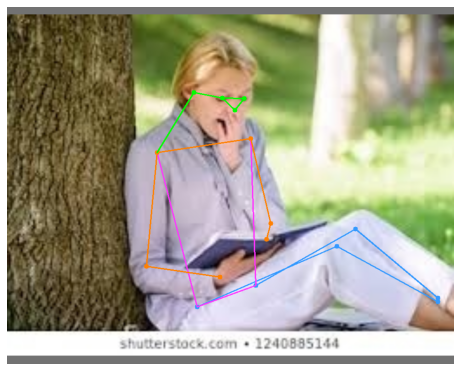

In [14]:
image = cv2.imread('/Python_codes/Pose_estimation_problem/Data/Images/Image_10026.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)   
output, _ = model(image)

output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()